In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../combined_reduced.csv')

In [3]:
X1 = np.load('./new_X.npy')

In [4]:
df.head()

,gunning_fog_index,lix,smog_index,wiener_sachtextformel,n_polysyllable_words,sent_neg,sent_neu,sent_pos,sent_compound,isolation_total,...,liwc_friends,liwc_health,liwc_ingestion,liwc_leisure,liwc_negative_emotion,liwc_positive_emotion,liwc_sadness,liwc_sexual,liwc_swear_words,liwc_work
0,9.145306,31.706803,9.387100,2.832296,12,0.171,0.768,0.061,-0.9418,0,...,0,3,0,0,5,2,3,0,0,0
1,8.314655,27.683190,9.017664,2.933491,17,0.000,0.935,0.065,0.8155,0,...,0,3,0,1,0,3,0,0,0,1
2,10.733333,34.240741,10.793553,4.375385,18,0.156,0.796,0.048,-0.8802,0,...,0,4,0,0,2,5,0,0,0,0
3,8.137030,27.109492,8.841846,2.895752,16,0.000,0.931,0.069,0.8062,0,...,0,3,0,1,0,3,0,0,0,0
4,9.302564,37.358974,9.725611,3.969113,8,0.177,0.670,0.153,-0.7992,0,...,0,1,0,0,3,1,0,0,0,2


In [5]:
# Convert the DataFrame to a NumPy array
df_array = df.to_numpy()

# Stack the DataFrame and the NumPy array horizontally
X_final = np.hstack((df_array, X1))

# The merged_array now contains both the columns from the DataFrame and the NumPy array for each row
print(X_final.shape)  # This will print (374499, 1141) for the example shapes given

(374499, 1141)


In [6]:
combined_df = pd.read_csv('../combined_df.csv')

In [7]:
from sklearn.model_selection import train_test_split

# X = combined_df.drop(['subreddit', 'post'],  axis=1)  # Features
y = combined_df['subreddit']  # Target

In [8]:
# Perform PCA on the X_final
from sklearn.decomposition import PCA

pca = PCA(n_components=300)
pca.fit(X_final)
X_final = pca.transform(X_final)


X_train, X_test, y_train, y_test = train_test_split(X_final  , y, test_size=0.2, random_state=42)

In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Encode the categorical target variable (y_train) using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Step 2: Flatten the encoded labels
y_train_encoded = y_train_encoded.argmax(axis=1)
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).argmax(axis=1)

In [10]:
from scratch_RFC import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the classifier to the training data
rf_classifier.fit(X_train, y_train_encoded)

# Making predictions on the test data
predictions = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test_encoded, predictions)
print("Accuracy:", accuracy)

Fitting RFC: 100%|██████████| 100/100 [7:20:47<00:00, 264.48s/it]  


Accuracy: 0.3986782376502003


In [11]:
# Generating a classification report
print("Classification Report:\n", classification_report(y_test_encoded, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.25      0.25      1577
           1       0.48      0.47      0.48      9182
           2       0.36      0.34      0.35      1254
           3       0.45      0.45      0.45     11419
           4       0.28      0.30      0.29      1754
           5       0.26      0.26      0.26      4899
           6       0.45      0.44      0.45     23472
           7       0.30      0.31      0.30      4724
           8       0.20      0.21      0.21      1766
           9       0.21      0.21      0.21      1788
          10       0.38      0.39      0.39     13065

    accuracy                           0.40     74900
   macro avg       0.33      0.33      0.33     74900
weighted avg       0.40      0.40      0.40     74900



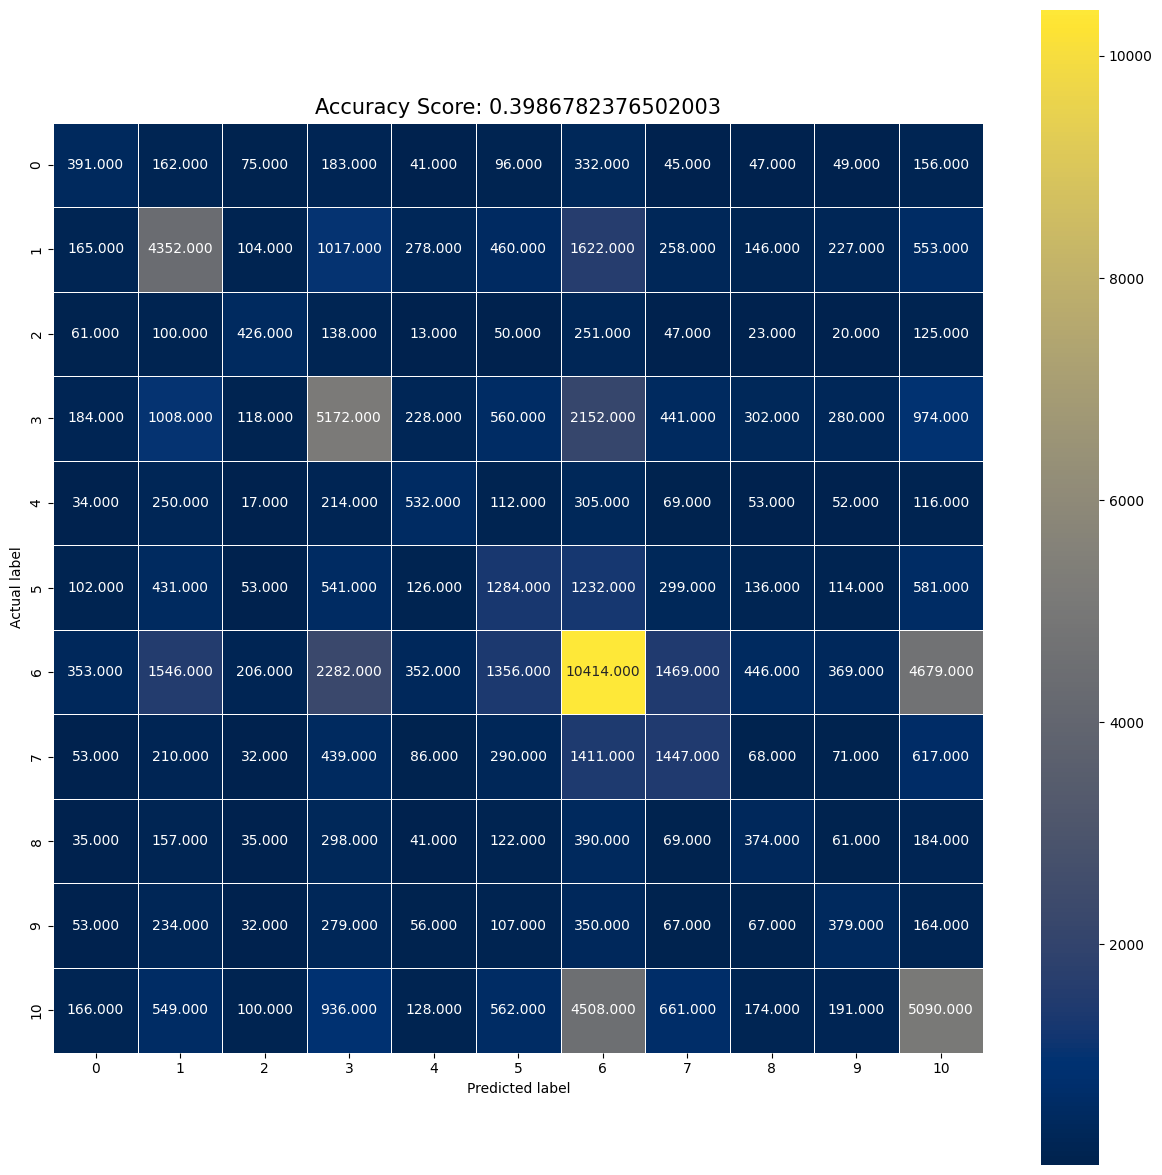

In [12]:
# display confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_encoded, predictions)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='cividis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(accuracy), size=15)
plt.show()